In [2]:
#Data processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

#Model performance metrics
from time import process_time
from memory_profiler import profile
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Feature selection and models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

#Data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
%load_ext memory_profiler

Import Data and Apply SMOTE Oversampling

In [4]:
#https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("online_shoppers_intention.csv")

In [5]:
#Identify categorical attributes
categorical_features = ["Month", "OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend"]
df_cat = df[categorical_features]

df_onehot = pd.get_dummies(df, columns = categorical_features, prefix = categorical_features)

#Tranform categorical attributes
label_encoder = LabelEncoder()
df_onehot['Revenue'] = label_encoder.fit_transform(df['Revenue'])

In [6]:
#Specify independent/ dependent values
X = df_onehot.drop(columns = "Revenue")
y = df_onehot["Revenue"]

#Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Model Functions

In [7]:
#Decision Tree Function
def DTClassifier(X_train, y_train, X_test, y_test):
  #Initialize the DecisionTreeClassifier
  tree_raw_imbalanced = DecisionTreeClassifier(criterion = "entropy")

  #Time Measurement
  start_time = process_time()

  #Fit the Classifier to the data
  tree_raw_imbalanced.fit(X_train, y_train)

  #Predict new Data
  y_pred = tree_raw_imbalanced.predict(X_test)

  #Time Measurement
  end_time = process_time()

  #Results
  cr = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  time = end_time - start_time
  print(cr)
  print(cm)
  print(time)

In [8]:
#Random Forest Model
def RFClassifier(X_train, y_train, X_test, y_test):
  #Initialize the Random Forest Classifier
  forest_raw_imbalanced = RandomForestClassifier(n_estimators = 100)

  #Time Measurement
  start_time = process_time()

  #Fit the classifier to the data
  forest_raw_imbalanced.fit(X_train, y_train)

  #Predict new Data
  y_pred = forest_raw_imbalanced.predict(X_test)

  #Time Measurement
  end_time = process_time()

  #Results
  cr = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  time = end_time - start_time
  print(cr)
  print(cm)
  print(time)

In [9]:
#Logistic Regression Model
def LRClassifier(X_train, y_train, X_test, y_test):
  #Initialize the Logistic Regression Classifier
  lr_raw_imbalanced = LogisticRegression(max_iter = 1000)

  #Time Measurement
  start_time = process_time()

  #Fit the classifier to the data
  lr_raw_imbalanced.fit(X_train, y_train)

  #Predict new Data
  y_pred = lr_raw_imbalanced.predict(X_test)

  #Time Measurement
  end_time = process_time()

  #Results
  cr = classification_report(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  time = end_time - start_time
  print(cr)
  print(cm)
  print(time)

Feature Selection

Control (all features)

In [10]:
%memit DTClassifier(X_train_smote, y_train_smote, X_test, y_test)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3094
           1       0.58      0.59      0.58       605

    accuracy                           0.86      3699
   macro avg       0.75      0.75      0.75      3699
weighted avg       0.86      0.86      0.86      3699

[[2834  260]
 [ 249  356]]
0.109375
peak memory: 187.00 MiB, increment: 7.80 MiB


In [11]:
%memit RFClassifier(X_train_smote, y_train_smote, X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3094
           1       0.73      0.61      0.66       605

    accuracy                           0.90      3699
   macro avg       0.83      0.78      0.80      3699
weighted avg       0.89      0.90      0.90      3699

[[2959  135]
 [ 238  367]]
1.3125
peak memory: 205.48 MiB, increment: 22.58 MiB


In [12]:
%memit LRClassifier(X_train_smote, y_train_smote, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3094
           1       0.70      0.42      0.53       605

    accuracy                           0.88      3699
   macro avg       0.80      0.69      0.73      3699
weighted avg       0.86      0.88      0.86      3699

[[2986  108]
 [ 349  256]]
0.875
peak memory: 191.01 MiB, increment: 9.47 MiB


C:\Users\david\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pearson Correlation (Filter method)

<AxesSubplot:>

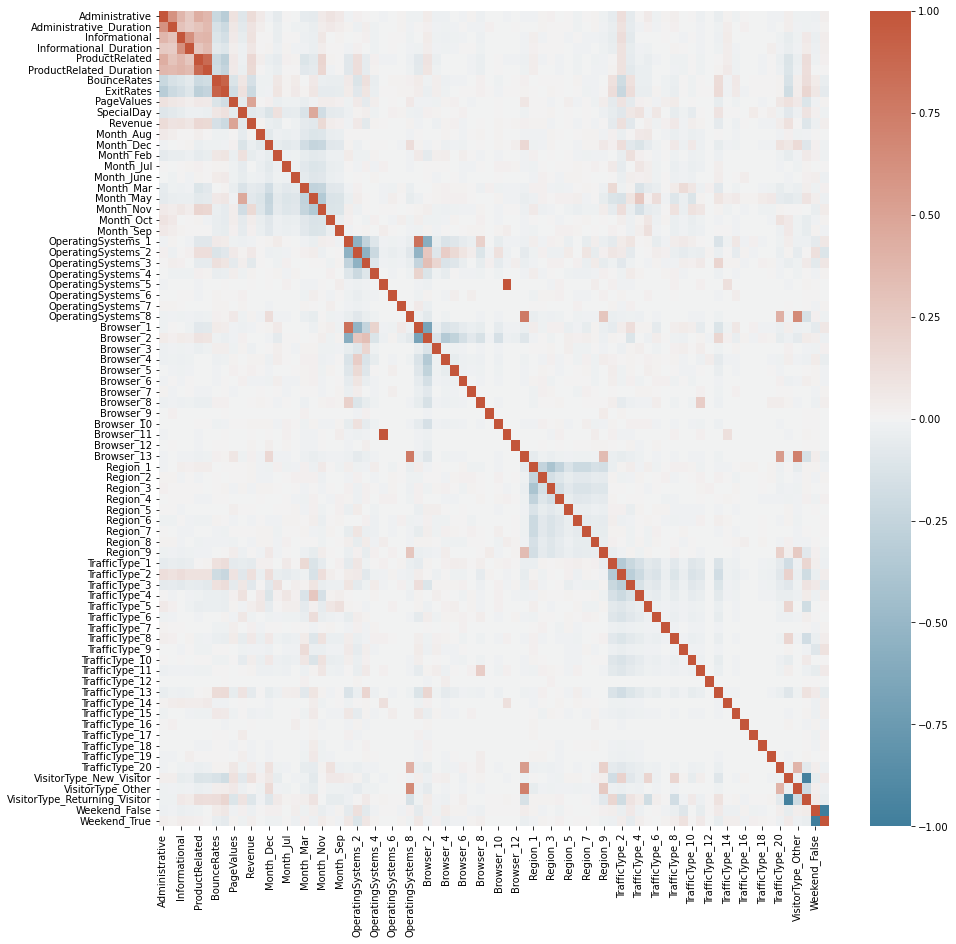

In [13]:
import seaborn as sns

#Correlation of Onehot encoded dataset

corr = df_onehot.corr()
f, ax = plt.subplots(figsize = (15, 15))
cmap = sns.diverging_palette(230,20, as_cmap = True)
sns.heatmap(corr, annot = False, cmap = cmap)

In [14]:
revenue_correlation = corr["Revenue"]
sorted_pearson_correlation = revenue_correlation.abs().sort_values(ascending = False)
print(sorted_pearson_correlation)

Revenue               1.000000
PageValues            0.492569
ExitRates             0.207071
ProductRelated        0.158538
Month_Nov             0.154774
                        ...   
Browser_11            0.000727
OperatingSystems_5    0.000727
TrafficType_4         0.000336
Browser_8             0.000236
TrafficType_14        0.000081
Name: Revenue, Length: 76, dtype: float64


In [34]:
pearson_df = pd.DataFrame(sorted_pearson_correlation)
pd.set_option('display.max_rows', None)
print(pearson_df)

                                Revenue
Revenue                        1.000000
PageValues                     0.492569
ExitRates                      0.207071
ProductRelated                 0.158538
Month_Nov                      0.154774
ProductRelated_Duration        0.152373
BounceRates                    0.150673
Administrative                 0.138917
TrafficType_2                  0.116347
VisitorType_New_Visitor        0.104136
VisitorType_Returning_Visitor  0.103843
Informational                  0.095200
Administrative_Duration        0.093587
TrafficType_3                  0.082808
SpecialDay                     0.082305
Month_May                      0.078320
OperatingSystems_3             0.070472
Informational_Duration         0.070345
TrafficType_13                 0.067310
TrafficType_1                  0.065901
Month_Mar                      0.063941
OperatingSystems_2             0.060040
TrafficType_8                  0.057167
Month_Feb                      0.047114


In [15]:
#Filter out for attributes with correlation > 0.09
filtered_correlation = sorted_pearson_correlation[sorted_pearson_correlation > 0.09]
filtered_attributes = filtered_correlation.index.tolist()
df_pearson = df_onehot[filtered_attributes]

In [16]:
#12 attributes (Onehot encoded) are kept

In [17]:
#Tranform categorical attributes
label_encoder = LabelEncoder()
df_pearson['Revenue'] = label_encoder.fit_transform(df_pearson['Revenue'])

C:\Users\david\AppData\Local\Temp/ipykernel_14448/764811756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pearson['Revenue'] = label_encoder.fit_transform(df_pearson['Revenue'])


In [18]:
#Specify independent/ dependent values
X_p = df_pearson.drop(columns = "Revenue")
y_p = df_pearson["Revenue"]

#Split the Data
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y_p, test_size = 0.3)

smote = SMOTE()
X_p_train_smote, y_p_train_smote = smote.fit_resample(X_p_train, y_p_train)

In [19]:
%memit DTClassifier(X_p_train_smote, y_p_train_smote, X_p_test, y_p_test)

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      3111
           1       0.52      0.66      0.58       588

    accuracy                           0.85      3699
   macro avg       0.73      0.77      0.75      3699
weighted avg       0.87      0.85      0.86      3699

[[2750  361]
 [ 197  391]]
0.09375
peak memory: 200.00 MiB, increment: 0.06 MiB


In [20]:
%memit RFClassifier(X_p_train_smote, y_p_train_smote, X_p_test, y_p_test)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3111
           1       0.60      0.76      0.67       588

    accuracy                           0.88      3699
   macro avg       0.77      0.83      0.80      3699
weighted avg       0.90      0.88      0.89      3699

[[2811  300]
 [ 143  445]]
1.53125
peak memory: 216.50 MiB, increment: 16.51 MiB


In [21]:
%memit LRClassifier(X_p_train_smote, y_p_train_smote, X_p_test, y_p_test)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3111
           1       0.59      0.70      0.64       588

    accuracy                           0.88      3699
   macro avg       0.77      0.81      0.78      3699
weighted avg       0.89      0.88      0.88      3699

[[2828  283]
 [ 174  414]]
0.4375
peak memory: 199.15 MiB, increment: 2.31 MiB


Random Forest (Embedded method)

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

#Fit random forest classifier
rf_classifier.fit(X_train_smote, y_train_smote)

feature_importances = rf_classifier.feature_importances_

rf_df = pd.DataFrame({"Feature": X_train_smote.columns, "Importance": feature_importances})

sorted_features = np.argsort(feature_importances)[::-1]

for i, idx in enumerate(sorted_features):
    print(f"Feature {i+1}: {feature_importances[idx]}")

Feature 1: 0.36787854081363947
Feature 2: 0.06243003947931147
Feature 3: 0.05446832323224609
Feature 4: 0.043819927872796115
Feature 5: 0.04294536947309589
Feature 6: 0.0372572823643368
Feature 7: 0.03339749744717403
Feature 8: 0.024471857608361576
Feature 9: 0.02165045924707186
Feature 10: 0.01871185176654437
Feature 11: 0.018551333367777385
Feature 12: 0.017650780800821053
Feature 13: 0.0171954341244421
Feature 14: 0.01639640652922472
Feature 15: 0.014360523218011245
Feature 16: 0.014212251724678084
Feature 17: 0.013756927910512659
Feature 18: 0.012598031908831245
Feature 19: 0.01150761985709055
Feature 20: 0.011355676019245864
Feature 21: 0.010592251989053541
Feature 22: 0.010001241990016452
Feature 23: 0.00995864356679853
Feature 24: 0.009791539634193151
Feature 25: 0.009483931068226857
Feature 26: 0.008040192339796588
Feature 27: 0.007540705489240674
Feature 28: 0.006381705297458913
Feature 29: 0.005017530420213831
Feature 30: 0.0046581051081313685
Feature 31: 0.004655065827217216

In [31]:
rf_df_sorted = rf_df.sort_values("Importance", ascending = False)
rf_df_sorted = rf_df_sorted.reset_index(drop = True)

pd.set_option('display.max_rows', None)

rf_df_sorted

,Feature,Importance
0,PageValues,3.678785e-01
1,ExitRates,6.243004e-02
2,ProductRelated_Duration,5.446832e-02
3,Administrative_Duration,4.381993e-02
4,ProductRelated,4.294537e-02
5,BounceRates,3.725728e-02
6,Month_May,3.339750e-02
7,Administrative,2.447186e-02
8,OperatingSystems_3,2.165046e-02
9,VisitorType_Returning_Visitor,1.871185e-02


In [ ]:
plt.bar(rf_df_sorted["Feature"], rf_df_sorted["Importance"])

In [ ]:
#Filter out for attributes with random forest score > 0.009
filtered_rf = rf_df_sorted[rf_df_sorted['Importance'] > 0.009]
#filtered_attributes_rf = filtered_rf.index.tolist()
df_rf = df_onehot[filtered_rf["Feature"]]

#24 features are kept after random forest feature selection
df_rf["Revenue"] = df_onehot["Revenue"]

In [ ]:
#Specify independent/ dependent values
X_rf = df_rf.drop(columns = "Revenue")
y_rf = df_rf["Revenue"]

#Split the Data
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.3)

smote = SMOTE()
X_rf_train_smote, y_rf_train_smote = smote.fit_resample(X_rf_train, y_rf_train)

In [ ]:
#Call model function

%memit DTClassifier(X_rf_train_smote, y_rf_train_smote, X_rf_test, y_rf_test)

In [ ]:
%memit RFClassifier(X_rf_train_smote, y_rf_train_smote, X_rf_test, y_rf_test)

In [ ]:
%memit LRClassifier(X_rf_train_smote, y_rf_train_smote, X_rf_test, y_rf_test)

RFE (Wrapper Method)

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

df_X_rfe = df_onehot.drop(columns = "Revenue")
df_y_rfe = df_onehot["Revenue"]

# Instantiate the model and RFE selector
model = LogisticRegression(solver = "liblinear")
rfe_selector = RFE(model, n_features_to_select = 20)

# Perform RFE feature selection
selected_features = rfe_selector.fit_transform(df_X_rfe, df_y_rfe)

# Get the mask of selected features
feature_mask = rfe_selector.support_

# Get the ranking of features (optional)
feature_ranking = rfe_selector.ranking_

In [25]:
# Print the selected feature indices
selected_indices = [i for i, mask in enumerate(feature_mask) if mask]
print("Selected feature indices:", selected_indices)

rfe_ranking_df = pd.DataFrame({"Feature": df_X_rfe.columns, "Rank": feature_ranking})
rfe_ranking_df = rfe_ranking_df.sort_values("Rank")

pd.set_option('display.max_rows', None)

print(rfe_ranking_df)

Selected feature indices: [6, 7, 9, 10, 12, 13, 17, 18, 19, 22, 30, 39, 50, 52, 56, 62, 64, 67, 73, 74]
                          Feature  Rank
74                   Weekend_True     1
73                  Weekend_False     1
19                      Month_Sep     1
18                      Month_Oct     1
17                      Month_Nov     1
39                     Browser_12     1
30                      Browser_3     1
62                 TrafficType_13     1
13                      Month_Jul     1
12                      Month_Feb     1
64                 TrafficType_15     1
9                      SpecialDay     1
52                  TrafficType_3     1
7                       ExitRates     1
6                     BounceRates     1
56                  TrafficType_7     1
50                  TrafficType_1     1
67                 TrafficType_18     1
10                      Month_Aug     1
22             OperatingSystems_3     1
68                 TrafficType_19     2
69              

In [26]:
df_rfe = df_onehot.iloc[:, selected_indices]

#20 features are kept after random forest feature selection
df_rfe["Revenue"] = df_onehot["Revenue"]

C:\Users\david\AppData\Local\Temp/ipykernel_14448/333540687.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfe["Revenue"] = df_onehot["Revenue"]


In [27]:
#Specify independent/ dependent values
X_rfe = df_rfe.drop(columns = "Revenue")
y_rfe = df_rfe["Revenue"]

#Split the Data
X_rfe_train, X_rfe_test, y_rfe_train, y_rfe_test = train_test_split(X_rfe, y_rfe, test_size = 0.3)

smote = SMOTE()
X_rfe_train_smote, y_rfe_train_smote = smote.fit_resample(X_rfe_train, y_rfe_train)

In [28]:
#Call decision tree function

%memit DTClassifier(X_rfe_train_smote, y_rfe_train_smote, X_rfe_test, y_rfe_test)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      3123
           1       0.24      0.42      0.30       576

    accuracy                           0.70      3699
   macro avg       0.56      0.59      0.56      3699
weighted avg       0.78      0.70      0.73      3699

[[2354  769]
 [ 335  241]]
0.046875
peak memory: 226.19 MiB, increment: 0.82 MiB


In [29]:
%memit RFClassifier(X_rfe_train_smote, y_rfe_train_smote, X_rfe_test, y_rfe_test)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      3123
           1       0.26      0.41      0.32       576

    accuracy                           0.73      3699
   macro avg       0.57      0.60      0.57      3699
weighted avg       0.78      0.73      0.75      3699

[[2463  660]
 [ 342  234]]
1.078125
peak memory: 268.39 MiB, increment: 42.21 MiB


In [30]:
%memit LRClassifier(X_rfe_train_smote, y_rfe_train_smote, X_rfe_test, y_rfe_test)

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      3123
           1       0.26      0.72      0.39       576

    accuracy                           0.64      3699
   macro avg       0.59      0.67      0.57      3699
weighted avg       0.82      0.64      0.69      3699

[[1952 1171]
 [ 159  417]]
0.046875
peak memory: 226.60 MiB, increment: 2.84 MiB
